# Create CCG-SICBL and STP-ICB lookup

The NHS England regions used to be subdivided into Clinical Commissioning Groups (CCGs) that could be grouped together into Sustainability and Transformation Partnerships (STPs).

In July 2022, CCGs were renamed to Sub-Integrated Care Board Locations (SICBLs) and STPs were renamed to Integrated Care Boards (ICBs).

| Name before July 2022 | Name after July 2022 |
| --- | --- |
| Clinical Commissioning Group (CCG) | Sub-Integrated Care Board Location (SICBL) |
| Sustainability and Transformation Partnership (STP) | Integrated Care Board (ICB) |

In this notebook we compare the boundaries of CCG and STP in April 2021 with the boundaries of SICBL and ICB in July 2022. We then create a lookup file from CCG and STP to SICBL and ICB names and codes.

## Notebook setup

In [1]:
# For handling the tabular data:
import pandas as pd
# For maps:
import geopandas
import matplotlib.pyplot as plt

# For tracking paths to files:
import os
from dataclasses import dataclass

In [2]:
# Define file paths
@dataclass(frozen=True)
class Paths:
    '''Singleton object for storing paths to data and database.'''

    dir_ons_tabular = '../data_tabular/ons_data/'
    dir_ons_geojson = '../data_geojson/ons_data/'

    ccg_stp = 'CCG21_STP21_EN_LU.csv'
    sicbl_icb = 'LOC22_ICB22_NHSER22_EN_LU'

    ccg_geojson = 'Clinical_Commissioning_Groups_April_2021_EN_BUC_2022.geojson'
    stp_geojson = 'Sustainability_and_Transformation_Partnerships_April_2021_EN_BGC_2022.geojson'
    sicbl_geojson = 'SICBL_JUL_2022_EN_BUC.geojson'
    icb_geojson = 'ICB_JUL_2022_EN_BGC_V3.geojson'

    df_output = 'ccg_stp_sicbl_icb.csv'

paths = Paths()

## Import region files

In [3]:
gdf_ccg = geopandas.read_file(os.path.join(paths.dir_ons_geojson, paths.ccg_geojson))
gdf_stp = geopandas.read_file(os.path.join(paths.dir_ons_geojson, paths.stp_geojson))
gdf_sicbl = geopandas.read_file(os.path.join(paths.dir_ons_geojson, paths.sicbl_geojson))
gdf_icb = geopandas.read_file(os.path.join(paths.dir_ons_geojson, paths.icb_geojson))

## Define function for making maps

In [20]:
def make_maps(gdf0, gdf1, titles=[]):
    fig, axs = plt.subplots(1, 3, figsize=(15, 6))

    ax0 = axs[0]
    ax1 = axs[1]
    ax2 = axs[2]

    gdf0.plot(ax=ax0, facecolor='none', edgecolor='k')
    gdf1.plot(ax=ax1, facecolor='none', edgecolor='k')

    gdf0.plot(ax=ax2, facecolor='none', edgecolor='r')
    gdf1.plot(ax=ax2, facecolor='none', edgecolor='k')

    if len(titles) > 0:
        ax0.set_title(titles[0])
        ax1.set_title(titles[1])

    for ax in axs:
        ax.axis('off')

    plt.show()

In [34]:
def make_maps(gdf0, gdf1, titles):
    fig, ax = plt.subplots(figsize=(10, 10))

    gdf0.plot(ax=ax, facecolor='none', edgecolor='r', label=titles[0])
    gdf1.plot(ax=ax, facecolor='none', edgecolor='k', label=titles[1])

    ax.axis('off')

    # Fake a legend:
    x, _, _, _ = gdf0['geometry'].total_bounds
    ax.plot([x, x+1e-7], [x, x+1e-7], color='r', label=titles[0])
    ax.plot([x, x+1e-7], [x, x+1e-7], color='k', label=titles[1])
    ax.legend()

    plt.show()

## Compare CCG with SICBL

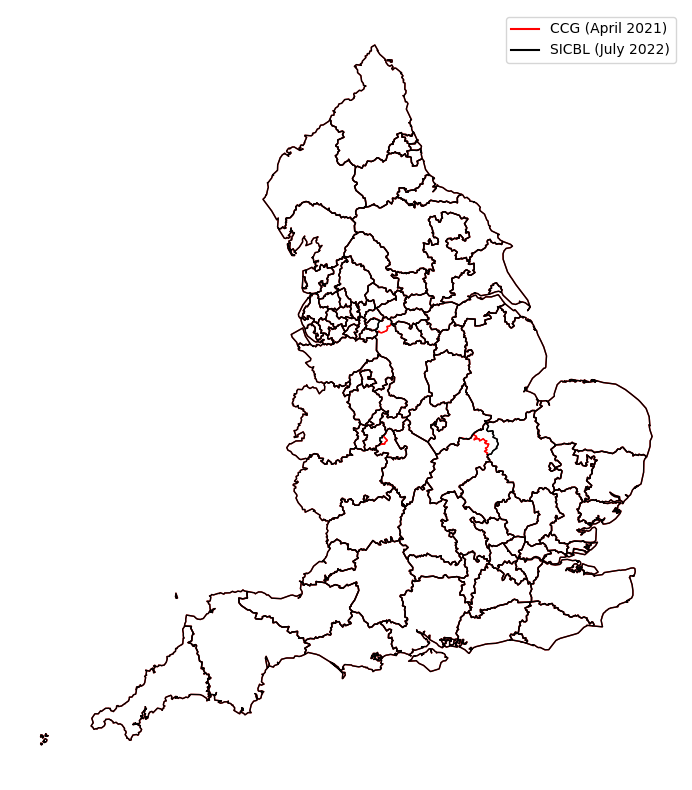

In [35]:
make_maps(gdf_ccg, gdf_sicbl, titles=['CCG (April 2021)', 'SICBL (July 2022)'])

The same codes are used for CCG and SICBL where possible. Find where the codes are different and so where these boundaries have changed:

In [37]:
ccg_codes = set(gdf_ccg['CCG21CD'])
sicbl_codes = set(gdf_sicbl['SICBL22CD'])

Regions that are in the CCG list but not SICBL:

In [54]:
gdf_ccg[gdf_ccg['CCG21CD'].isin(ccg_codes - sicbl_codes)][['CCG21CD', 'CCG21NM']]

,CCG21CD,CCG21NM
9,E38000026,NHS Cambridgeshire and Peterborough CCG
54,E38000182,NHS Tameside and Glossop CCG
69,E38000220,NHS Birmingham and Solihull CCG
77,E38000229,NHS Derby and Derbyshire CCG
90,E38000242,NHS Northamptonshire CCG
98,E38000250,NHS Black Country and West Birmingham CCG


Regions that are in the SICBL list but not CCG:

In [55]:
gdf_sicbl[gdf_sicbl['SICBL22CD'].isin(sicbl_codes - ccg_codes)][['SICBL22CD', 'SICBL22NM']]

,SICBL22CD,SICBL22NM
53,E38000263,NHS Greater Manchester ICB - 01Y
101,E38000258,NHS Birmingham and Solihull ICB - 15E
102,E38000259,NHS Black Country ICB - D2P2L
103,E38000260,NHS Cambridgeshire and Peterborough ICB - 06H
104,E38000261,NHS Derby and Derbyshire ICB - 15M
105,E38000262,NHS Northamptonshire ICB - 78H


By eyeballing these names we can guess that the changed regions match up like this:

In [ ]:
ccg_sicbl_changes = {
    'NHS Cambridgeshire and Peterborough CCG': 'NHS Cambridgeshire and Peterborough ICB - 06H',
    'NHS Tameside and Glossop CCG': 'NHS Greater Manchester ICB - 01Y',
    'NHS Birmingham and Solihull CCG': 'NHS Birmingham and Solihull ICB - 15E',
    'NHS Derby and Derbyshire CCG': 'NHS Derby and Derbyshire ICB - 15M',
    'NHS Northamptonshire CCG': 'NHS Northamptonshire ICB - 78H',
    'NHS Black Country and West Birmingham CCG': 'NHS Black Country ICB - D2P2L',
}

## Compare STP with ICB

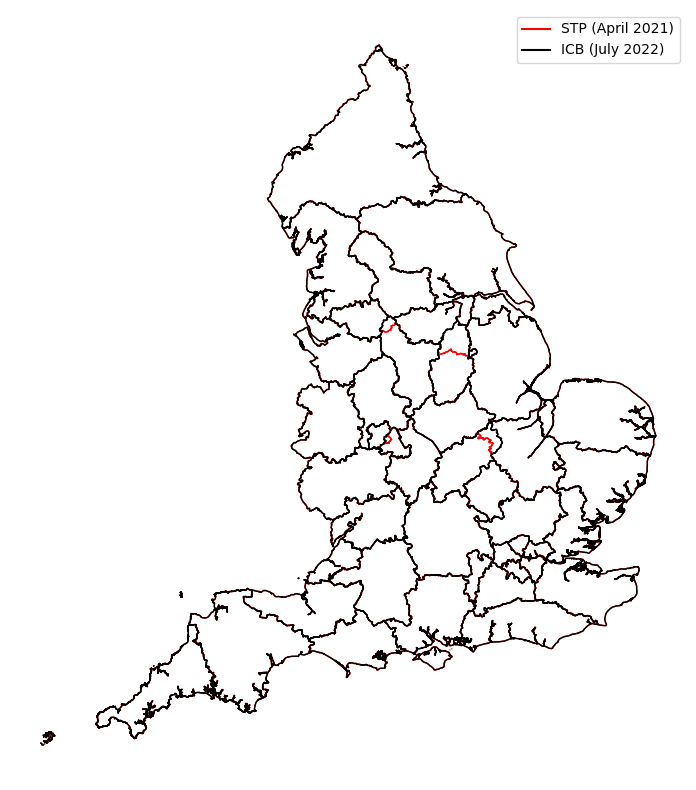

In [46]:
make_maps(gdf_stp, gdf_icb, titles=['STP (April 2021)', 'ICB (July 2022)'])

The same codes are used for STP and ICB where possible. Find where the codes are different and so where these boundaries have changed:

In [47]:
stp_codes = set(gdf_stp['STP21CD'])
icb_codes = set(gdf_icb['ICB22CD'])

Regions that are in the STP list but not ICB:

In [56]:
gdf_stp[gdf_stp['STP21CD'].isin(stp_codes - icb_codes)][['STP21CD', 'STP21NM']]

,STP21CD,STP21NM
0,E54000007,Greater Manchester Health and Social Care Part...
2,E54000009,South Yorkshire and Bassetlaw
5,E54000012,Joined Up Care Derbyshire
7,E54000014,Nottingham and Nottinghamshire Health and Care
9,E54000016,The Black Country and West Birmingham
10,E54000017,Birmingham and Solihull
13,E54000020,Northamptonshire
14,E54000021,Cambridgeshire and Peterborough


Regions that are in the ICB list but not STP:

In [57]:
gdf_icb[gdf_icb['ICB22CD'].isin(icb_codes - stp_codes)][['ICB22CD', 'ICB22NM']]

,ICB22CD,ICB22NM
34,E54000055,NHS Birmingham and Solihull Integrated Care Board
35,E54000056,NHS Cambridgeshire and Peterborough Integrated...
36,E54000057,NHS Greater Manchester Integrated Care Board
37,E54000058,NHS Derby and Derbyshire Integrated Care Board
38,E54000059,NHS Northamptonshire Integrated Care Board
39,E54000060,NHS Nottingham and Nottinghamshire Integrated ...
40,E54000061,NHS South Yorkshire Integrated Care Board
41,E54000062,NHS Black Country Integrated Care Board


By eyeballing these names we can guess that the changed regions match up like this:

In [ ]:
stp_icb_changes = {
    'Greater Manchester Health and Social Care Partnership': 'NHS Greater Manchester Integrated Care Board ',
    'South Yorkshire and Bassetlaw': 'NHS South Yorkshire Integrated Care Board',
    'Joined Up Care Derbyshire': 'NHS Derby and Derbyshire Integrated Care Board',
    'Nottingham and Nottinghamshire Health and Care': 'NHS Nottingham and Nottinghamshire Integrated Care Board',
    'The Black Country and West Birmingham': 'NHS Black Country Integrated Care Board',
    'Birmingham and Solihull': 'NHS Birmingham and Solihull Integrated Care Board',
    'Northamptonshire': 'NHS Northamptonshire Integrated Care Board',
    'Cambridgeshire and Peterborough': 'NHS Cambridgeshire and Peterborough Integrated Care Board',
}